<a href="https://colab.research.google.com/github/MariaG0205/ModeladoySimulacion/blob/main/Ejemplo_y_aplicaciones_para_Dop853.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
%matplotlib inline
import numpy as np               # Python numerico
import matplotlib.pyplot as plt  # Para graficar
import time                      # Medida de tiempo
from scipy.integrate import solve_ivp  #Para usar metodos como DOP853


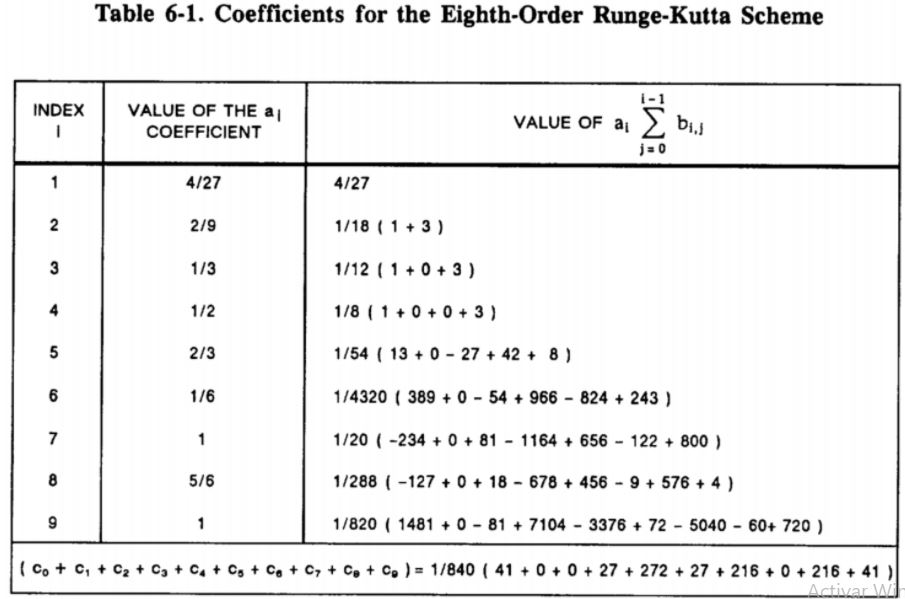

# Scipy Dop853 module solver

In [52]:
t=np.linspace(0,3,25)                                                #Se definen los limites de muestra y el numero de intervalos

def RHS2(t, y):
    return -2*t*y                                                    #Planteamiento de ecuación diferencial
sol = solve_ivp(RHS2,(0, 3), np.array([2]),method='DOP853',t_eval=t) #se introduce el metodo DOP853 con limites de 0 a 3 y valor inicial=2


def an(t,y):
  return 2*np.exp(-t**2)                                             #Solución análitica del sistema 
   

Text(0.5, 0, '$t$')

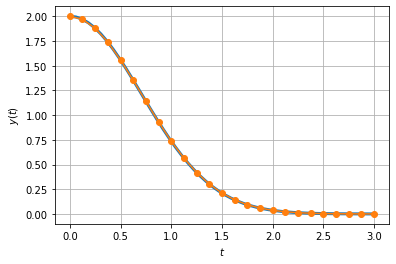

In [53]:
ta = np.linspace(0,3) #limites en x
ya = an(ta, 4)
plt.figure()  #Se grafican las funciones 
plt.plot(ta, ya , linewidth=3.0,label='Analytical solution.')
plt.plot(sol.t, sol.y[0], '-o')
plt.grid()
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')


**Este seria el proceso para realizar la primera iteración del metodo** 


$$\frac{dy}{dx}=-2xy$$

Solution:

\begin{align}
k_1 &=  g(x_n, t_n) \\[1.0em]
k_1 &=  g(0, 2) \\[1.0em]
k_1 & = -2(0)(2)=0 \\[1.0em]
k_1 & =0
\\[1.0em]
\\[1.0em]
k_2 &= g(x_n + a_{2,1}k_1 h , t+c_2 h ) \\[1.0em]
k_2 &= g(0 +  \frac{4}{27}(0.1)(0) , 2+\frac{4}{27}0.1 ) \\[1.0em]
k_2 &= g(0, 2.0148 ) \\[1.0em]
k_2 &=  -2(0)(2.0148) \\[1.0em]
k_2 & = 0
\\[1.0em]
\\[1.0em]
k_3 &= g(x_n + h(a_{3,1}k_1 + a_{3,2}k_2), t+c_3h ) \\[1.0em]
k_3 &= g(0 + \frac{0.1}{18}(0 + 3(0)), 2+0.1\frac{2}{9} ) \\[1.0em]
k_3 &= g(0, 2.0222 ) \\[1.0em]
k_3 &= -2(0)(2.0222)=0\\[1.0em]
k_3 &= 0
\\[1.0em]
\\[1.0em]
k_4 &= 0 
\\[1.0em]
k_5 &= 0 
\\[1.0em]
k_6 &= 0 
\\[1.0em]
k_7 &= 0 
\\[1.0em]
k_8 &= 0
\\[1.0em]
k_9 &= 0
\\[1.0em]
k_{10} &= 0
\\[1.0em]
k_{8RK} &= g(x_n + \frac{h}{840}(41*k_1 + 27*k_4 +272*k_5 +27*k_6 + 216*k_7+ 216*k_9+41*k_10)\\[1.0em]
k_{8RK} &= g(0+ \frac{h}{840}(41*0+ 27*0 +272*0 +27*0 + 216*0 + 216*k0+41*0)\\[1.0em]
k_{8RK} &= 0\\[1.0em]
\end{align}







Ahora comparemos la solución de este método con el Runge Kutta de orden 4 y 8
[texto del enlace](https://www.wolframalpha.com/input/?i=Runge-Kutta+method%2C+dy%2Fdx+%3D+-2xy%2C+y%280%29+%3D+2%2C+from+1+to+3%2C+h+%3D+0.1)

El tamaño de paso es: 0.1


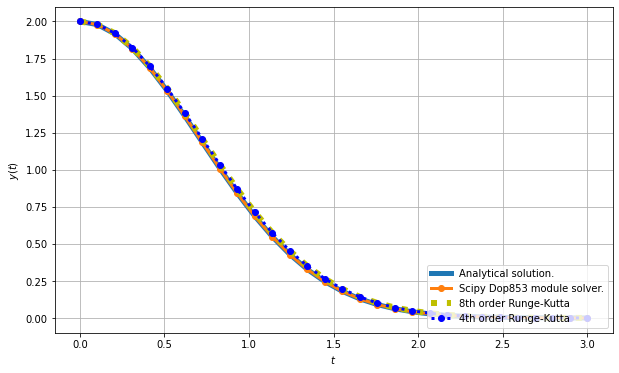

In [68]:
t0=0.0                         #Tiempo inicial
tN=3.0                         #Tiempo final
N=30                           #Numero de intervalos
t=np.linspace(t0,tN,N) 
x_8RK=np.zeros(N)              #Se crea una matriz de ceros para Runge-Kutta de orden 8
h=(tN-t0)/N                    #Se establece el tamaño de paso
x_8RK[0]=2                     # Condición inicial del sistema 
x_4RK = np.zeros(N)            #Se crea una matriz de ceros para Runge-Kutta de orden 4
x_4RK[0]=2                     #Condición inicial del sistema
print('El tamaño de paso es:',h)


def RHS2(t, y):
    return -2*t*y
sol = solve_ivp(RHS2,(0, 3), np.array([2]),method='DOP853',t_eval=t)  #se aplica la solución por el metodo DOP853 con limites de 0 a 3 y valor inicial=2

def an(t,y):
  return 2*np.exp(-t**2) #Se define la solución análitica del sistema
  
def g(t,y):
  return -2*t*y #Se define la función del sistema para el metodo Runge Kutta de grado 4 y 8

for n in range(0,N-1):  #Iteraciones para el Runge Kutta de grado 4
    k1 = h*g( x_4RK[n]       , t[n]         )
    k2 = h*g( x_4RK[n] + k1/2, t[n] + (h/2) ) 
    k3 = h*g( x_4RK[n] + k2/2, t[n] + (h/2) ) 
    k4 = h*g( x_4RK[n] + k3  , t[n] +  h    )
    
    x_4RK[n+1] = x_4RK[n] + k1/6 + k2/3 + k3/3 + k4/6 #Solución del sistema

for n in range(0,N-1):  #Iteraciones para el Runge Kutta de grado 8
    k1=g(x_8RK[n],t[n])
    k2=g(x_8RK[n]+(h*4/27)*k1,t[n]+(h*(4/27))) 
    k3=g(x_8RK[n]+(h/18)*(k1+(3*k2)),t[n]+(h*(2/9))) 
    k4=g(x_8RK[n]+(h/12)*(k1+(3*k3)),t[n]+(h*(1/3)))
    k5=g(x_8RK[n]+(h/8)*(k1+(3*k4)),t[n]+(h*(1/2)))
    k6=g(x_8RK[n]+(h/54)*((13*k1)-(27*k3)+(42*k4)+(8*k5)),t[n]+(h*(2/3)))
    k7=g(x_8RK[n]+(h/4320)*((389*k1)-(54*k3)+(966*k4)-(824*k5)+(243*k6)),t[n]+(h*(1/6)))
    k8=g(x_8RK[n]+(h/20)*((-234*k1)+(81*k3)-(1164*k4)+(656*k5)-(122*k6)+(800*k7)),t[n]+h)
    k9=g(x_8RK[n]+(h/288)*((-127*k1)+(18*k3)-(678*k4)+(456*k5)-(9*k6)+(576*k7)+(4*k8)),t[n]+(h*(5/6)))
    k10=g(x_8RK[n]+(h/820)*((1481*k1)-(81*k3)+(7104*k4)-(3376*k5)+(72*k6)-(5040*k7)-(60*k8)+(720*k9)),t[n]+h)
    
    x_8RK[n+1] = x_8RK[n] + (h/840)*(k1*41 + 27*k4 +272*k5 +27*k6+216*k7+216*k9+41*k10) #Solución del sistema

ta = np.linspace(0, 3)
ya = an(t, 4)
#A continuación se grafican todas las soluciones usando diferentes metodos de solución
plt.figure(figsize=(10,6))
plt.plot(t, ya ,linewidth=5.0,  label='Analytical solution.')
plt.plot(sol.t, sol.y[0], '-o',linewidth=3.0,label='Scipy Dop853 module solver.')
plt.plot(t,x_8RK,':y' , linewidth=6.0, label=r'8th order Runge-Kutta')
plt.plot(t,x_4RK,':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc=4) 

Para ver con mayor exactitud...

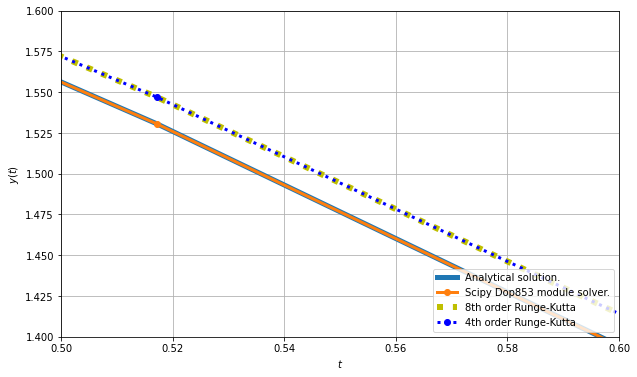

In [69]:
ta = np.linspace(0, 3)
ya = an(t, 4)
plt.figure(figsize=(10,6))
plt.plot(t, ya ,linewidth=5.0,  label='Analytical solution.')
plt.plot(sol.t, sol.y[0], '-o',linewidth=3.0,label='Scipy Dop853 module solver.')
plt.plot(t,x_8RK,':y' , linewidth=6.0, label=r'8th order Runge-Kutta')
plt.plot(t,x_4RK,':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.xlim(0.5,0.6)
plt.ylim(1.4,1.6)
plt.legend(loc=4) 

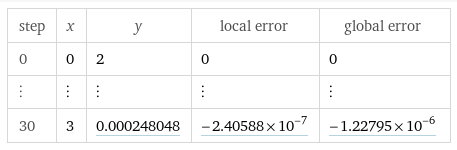

#Aplicaciones



## Lotka volterra

In [ ]:
def lotka_volterra(t, x):
    # define parameters
    X = x[0]
    Y = x[1]
    a = 1
    b = 2
    g = 1.5
    d = 2
    dxdt = a*X - b*X*Y
    dydt = g*X*Y - d*Y
    # the function returns the vector [fx, fy]
    return [dxdt, dydt]

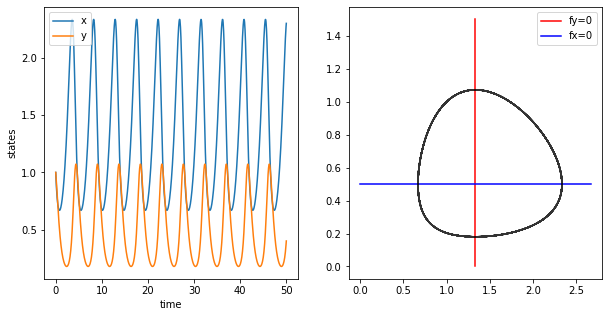

In [ ]:
import pandas as pd

# parameters for lotka volterra
a = 1
b = 2
g = 1.5
d = 2

# solve the ODE
y0 = [1, 1]
sol = solve_ivp(lotka_volterra, y0=y0, t_span=[0, 50],method='DOP853', t_eval=np.linspace(0,50, num=1001))
# store solution in dataframe
s = pd.DataFrame(np.transpose(sol.y), columns=['x', 'y'])
s['time'] = sol.t

# plot solution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plot timecourse
ax1.plot(s.time, s.x, label='x')
ax1.plot(s.time, s.y, label='y')

ax1.set_xlabel('time')
ax1.set_ylabel('states')
ax1.legend(loc='upper left')
ax2.plot([d/g, d/g],[0, 3*a/b],'r-', label="fy=0")
ax2.plot([0, 2*d/g],[a/b, a/b],'b-', label="fx=0")
ax2.plot(s.x, s.y, 'k', alpha=0.8)
ax2.legend()
plt.show()

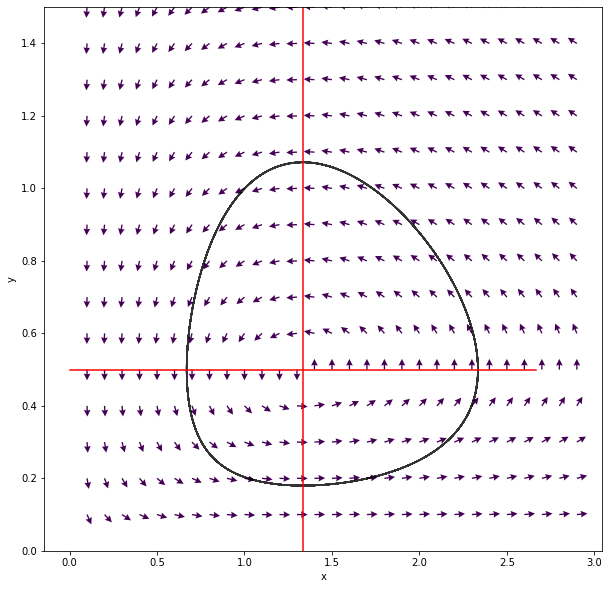

In [ ]:
y0 = [1.0, 1.0]
sol = solve_ivp(lotka_volterra, y0=y0, t_span=[0, 50], method='DOP853',t_eval=np.linspace(0,50, num=1001))
# store solution in dataframe
s = pd.DataFrame(np.transpose(sol.y), columns=['x', 'y'])
s['time'] = sol.t

x = np.arange(0.1,3,0.1); y = np.arange(0.1,3,0.1)
[xg,yg] = np.meshgrid(x,y)
n = np.size(x); m = np.size(x)
u = np.zeros([n,m])
v = np.zeros([n,m])

for i in range(n):
    for j in range(m):
        df = lotka_volterra(1, [xg[i,j],yg[i,j]])
        df = df/np.linalg.norm(df)
        u[i,j] = df[0]
        v[i,j] = df[1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

h = ax.quiver(xg,yg,u,v,0.5, headwidth=5)
ax.plot(s.x, s.y, 'k-', alpha=0.8)
ax.plot([d/g, d/g],[0, 3*a/b],'r-')
ax.plot([0, 2*d/g],[a/b, a/b],'r-')
ax.set_ylim(0, 1.5)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

## Atractor de Lorenz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  if sys.path[0] == '':


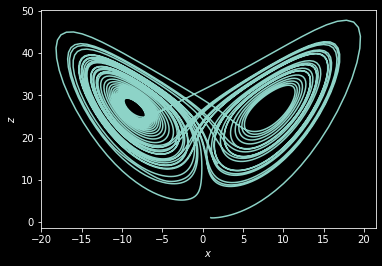

In [ ]:
    from scipy import linspace
    from scipy.integrate import solve_ivp
    import matplotlib.pyplot as plt

    plt.style.use(['dark_background'])
    def lorenz(t, xyz):
        x, y, z = xyz
        s, r, b = 10, 28, 8/3. # parameters Lorentz used
        return [s*(y-x), x*(r-z) - y, x*y - b*z]

    a, b = 0, 40
    t = linspace(a, b, 4000)

    sol1 = solve_ivp(lorenz, [a, b], [1,1,1],method='DOP853', t_eval=t)

    plt.plot(sol1.y[0], sol1.y[2])
    plt.xlabel("$x$")
    plt.ylabel("$z$")
    plt.show()

    

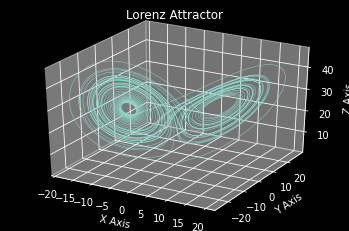

In [ ]:

sol1 = solve_ivp(lorenz, [a, b], [1,1,1],method='DOP853', t_eval=t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(sol1.y[0], sol1.y[1],sol1.y[2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()